In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
data = pd.read_csv(r"C:\Users\HP\Desktop\Bank customer churn analysis\Bank+Customer+Churn (1)\Bank_Churn.csv")

In [91]:
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [92]:
data.shape

(10000, 13)

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [94]:
data.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# Customer Overview

What is the overall customer churn rate?

In [95]:
churn_rate = data['Exited'].mean()*100
print(f"Overall customer churned rate: {churn_rate:.2f}%")

Overall customer churned rate: 20.37%


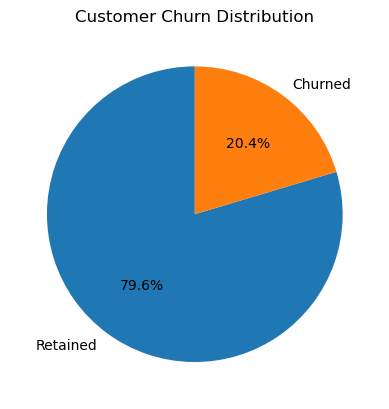

In [96]:
churn_counts = data['Exited'].value_counts()

plt.figure()
plt.pie(
    churn_counts,
    labels=['Retained', 'Churned'],
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Customer Churn Distribution')
plt.show()


How is churn distributed across countries (Geography)?

In [97]:
data.head(1)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.0,1,1,1,101348.88,1


In [98]:
data.groupby('Geography')['Exited'].mean()*100

Geography
France     16.154767
Germany    32.443204
Spain      16.673395
Name: Exited, dtype: float64

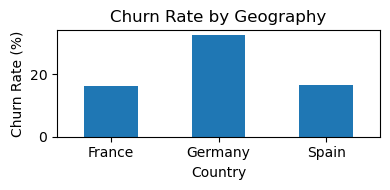

In [99]:


churn_geo = (
    data.groupby('Geography')['Exited'].mean()*100
        
        
)

plt.figure(figsize=(4,2))
churn_geo.plot(kind='bar')
plt.title('Churn Rate by Geography')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Country')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Does churn vary between male and female customers?

In [100]:
data.groupby('Gender')['Exited'].mean()*100

Gender
Female    25.071539
Male      16.455928
Name: Exited, dtype: float64

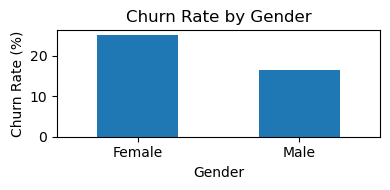

In [101]:
churn_gender = (data.groupby('Gender')['Exited'].mean()*100
               )
plt.figure(figsize =(4,2))
churn_gender.plot(kind='bar')
plt.title('Churn Rate by Gender')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# Demographic Drivers of Churn

How does age differ between churned and retained customers?

In [102]:
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [103]:
data['Age'].dtype

dtype('int64')

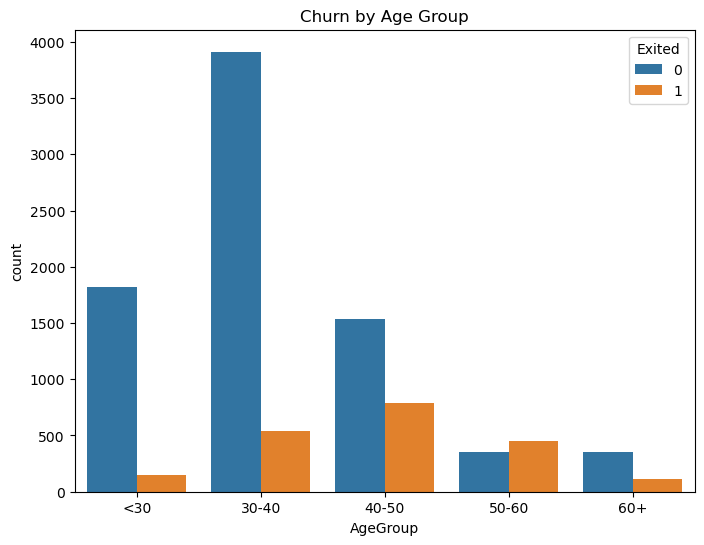

In [105]:
data['AgeGroup'] = pd.cut(data['Age'], bins=[0, 30, 40, 50, 60, np.inf], labels=['<30', '30-40', '40-50', '50-60', '60+'])
plt.figure(figsize=(8, 6))
sns.countplot(x='AgeGroup', hue='Exited', data=data)
plt.title('Churn by Age Group')
plt.show()


In [108]:
churn_rate_age = data.groupby('AgeGroup')['Exited'].mean()*100
print(churn_rate_age)

AgeGroup
<30       7.520325
30-40    12.087171
40-50    33.965517
50-60    56.210790
60+      24.784483
Name: Exited, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_14392\2052926074.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_age = data.groupby('AgeGroup')['Exited'].mean()*100


# Account & Engagement Factors

How does churn change with customer tenure?

In [110]:
data.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'AgeGroup'],
      dtype='object')

In [111]:
data.groupby('Tenure')['Exited'].mean()*100

Tenure
0     23.002421
1     22.415459
2     19.179389
3     21.110010
4     20.525784
5     20.652174
6     20.268873
7     17.217899
8     19.219512
9     21.646341
10    20.612245
Name: Exited, dtype: float64

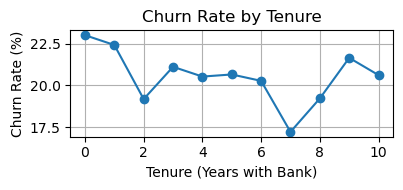

In [114]:
churn_tenure = (data.groupby('Tenure')['Exited'].mean()*100
               )

plt.figure(figsize=(4,2))
churn_tenure.plot(kind='line', marker='o')
plt.title('Churn Rate by Tenure')
plt.xlabel('Tenure (Years with Bank)')
plt.ylabel('Churn Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()


Are inactive members more likely to churn than active members?

In [116]:
data.groupby('IsActiveMember')['Exited'].mean()*100

IsActiveMember
0    26.850897
1    14.269074
Name: Exited, dtype: float64

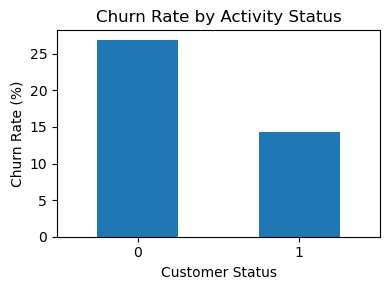

In [118]:
churn_active = (data.groupby('IsActiveMember')['Exited'].mean()*100
               )
plt.figure(figsize=(4,3))
churn_active.plot(kind='bar')
plt.title('Churn Rate by Activity Status')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Customer Status')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Does having a credit card reduce the likelihood of churn?

In [120]:
data.groupby('HasCrCard')['Exited'].mean()*100
               

HasCrCard
0    20.814941
1    20.184266
Name: Exited, dtype: float64

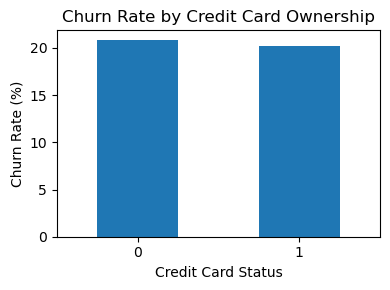

In [122]:
churn_card = (data.groupby('HasCrCard')['Exited'].mean()*100
               )

plt.figure(figsize=(4,3))
churn_card.plot(kind='bar')
plt.title('Churn Rate by Credit Card Ownership')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Credit Card Status')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

How does churn vary with the number of products used?

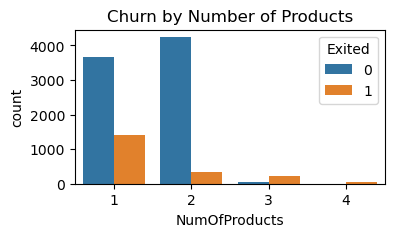

In [124]:
plt.figure(figsize=(4,2))
sns.countplot(x='NumOfProducts', hue='Exited', data=data)
plt.title('Churn by Number of Products')
plt.show()

Is there a noticeable difference in credit score distribution for churned vs retained customers?

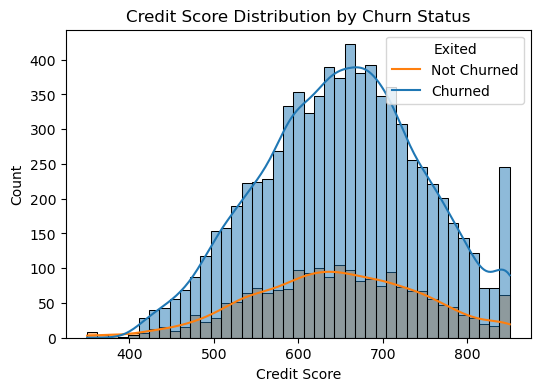

In [125]:
plt.figure(figsize=(6,4))
sns.histplot(data, x='CreditScore', hue='Exited', kde=True)
plt.title('Credit Score Distribution by Churn Status')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.legend(title='Exited', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()

What is the relationship between account balance and churn?